In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('mses/ERM-beta.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
#df.dtypes
#df1 = df.loc[df['optimization'] == 'weighted-ERM']


measure = ['approx-error']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result_beta = df.groupby(['optimization', 'SNR',  'nodes'], as_index=False).agg(agg_dict)

In [2]:
with open('mses/ERM-delta.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
#df.dtypes
#df1 = df.loc[df['optimization'] == 'weighted-ERM']


measure = ['approx-error']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result_delta = df.groupby(['optimization', 'SNR',  'nodes'], as_index=False).agg(agg_dict)

In [3]:
with open('mses/ERM-sigma.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
#df.dtypes
#df1 = df.loc[df['optimization'] == 'weighted-ERM']


measure = ['approx-error']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result_sigma = df.groupby(['optimization', 'SNR',  'nodes'], as_index=False).agg(agg_dict)


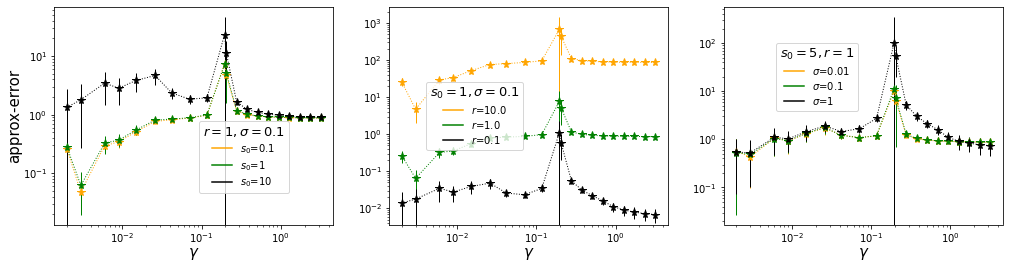

In [4]:
xlabelsize = 15
legendsize = 10
legendtitlesize = 13
ylabelsize = 15
xlabelspace = 0.5
ylabelspace = 0.5
plt.rcParams['legend.labelspacing'] = 0.3


SNRs = [ 0.1,  1, 10]
colors = ['orange', 'green', 'black']#, 'black']
ltys = ['-', '--', '-.']#,  ':']
lws = [3, 2, 1]
alphas = [0.2, 0.5, 1]






fig, ax = plt.subplots(1, 3, figsize = (17, 4))
u = 0
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    result1 = result_beta.loc[result_beta['SNR']==SNR]
    nodes, mean_approx, std_approx = result1['nodes'],\
            result1['approx-error']['mean'], result1['approx-error']['std']

    
    ax[u].errorbar(nodes/1000, mean_approx, std_approx, color = c, linestyle = ':',\
             marker = '*', markersize = 8, lw = 1, alpha = 1)
    
    ax[u].set_yscale('log')
    ax[u].set_xscale('log')
    ax[u].set_xlabel('$\\gamma$', fontsize = xlabelsize, labelpad = xlabelspace)
    ax[u].set_ylabel('approx-error', fontsize = ylabelsize, labelpad = ylabelspace)
    
        
legendtitle = '$r=1, \\sigma=0.1$'  
lines , labels = [], []
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    lines.append(Line2D([0], [0], color=c))
    labels.append('$s_0$='+f'{SNR}')
ax[u].legend(lines, labels, fontsize = legendsize, title = legendtitle, title_fontsize = legendtitlesize,\
     bbox_to_anchor = (0.5, 0.5))










u = 1
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    result1 = result_delta.loc[result_delta['SNR']==SNR]
    nodes, mean_approx, std_approx = result1['nodes'],\
            result1['approx-error']['mean'], result1['approx-error']['std']

    
    ax[u].errorbar(nodes/1000, mean_approx, std_approx, color = c, linestyle = ':',\
             marker = '*', markersize = 8, lw = 1, alpha = 1)
    
    ax[u].set_yscale('log')
    ax[u].set_xscale('log')
    ax[u].set_xlabel('$\\gamma$', fontsize = xlabelsize, labelpad = xlabelspace)
    
    
        
legendtitle = '$s_0=1, \sigma = 0.1$'
lines , labels = [], []
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    lines.append(Line2D([0], [0], color=c))
    labels.append('$r$='+f'{1/SNR}')
ax[u].legend(lines, labels, fontsize = legendsize, title = legendtitle, title_fontsize = legendtitlesize,\
     bbox_to_anchor = (0.5, 0.5))




SNRs = [0.01, 0.1, 1]
u = 2
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    result1 = result_sigma.loc[result_sigma['SNR']==SNR]
    nodes, mean_approx, std_approx = result1['nodes'],\
            result1['approx-error']['mean'], result1['approx-error']['std']

    
    ax[u].errorbar(nodes/1000, mean_approx, std_approx, color = c, linestyle = ':',\
             marker = '*', markersize = 8, lw = 1, alpha = 1)
    
    ax[u].set_yscale('log')
    ax[u].set_xscale('log')
    ax[u].set_xlabel('$\\gamma$', fontsize = xlabelsize, labelpad = xlabelspace)
    
    
        
legendtitle = '$s_0=5, r=1$'
lines , labels = [], []
for i, (SNR, c) in enumerate(zip(SNRs, colors)):
    lines.append(Line2D([0], [0], color=c))
    labels.append('$\\sigma$='+f'{SNR}')
ax[u].legend(lines, labels, fontsize = legendsize, title = legendtitle, title_fontsize = legendtitlesize,\
     bbox_to_anchor = (0.5, 0.5))

plt.savefig('plots/Sim_NN_ERM.pdf', bbox_inches='tight')